In [1]:
import os
import cv2

def detect_faces(image_path, output_folder):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    img = cv2.imread(image_path)


    faces = face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5)
    for i, (x, y, w, h) in enumerate(faces):
        face_img = img[y:y+h, x:x+w]
        face_filename = os.path.basename(image_path)
        cv2.imwrite(os.path.join(output_folder, face_filename), face_img)
if __name__ == "__main__":
    dataset_path = r'E:\autism2\autistic'
    output_folder = r"E:\Autism_facedata\autism"

    os.makedirs(output_folder, exist_ok=True)

    for image_file in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_file)
        detect_faces(image_path, output_folder)


In [133]:
#DATA AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
from PIL import Image

dataset_path = r'E:\nothing'

save_dir = r'E:\nothing1'

os.makedirs(save_dir, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)

    img = image.load_img(img_path)
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    num_augmented_images = 5
    for i, batch in enumerate(datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix=filename, save_format='jpeg')):
        if i == num_augmented_images - 1:
            break


In [6]:
#DATA RESIZE & GRAY SCALED
import os
from PIL import Image
folder_path = r'E:\autism2\non_autistic'
new_folder=r'E:\autism2'
files = os.listdir(folder_path)

image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)

    img = Image.open(image_path)

    width, height = img.size
    resized_img = img.resize((70, 70))

    output_path = os.path.join(new_folder, f"no_resized_{image_file}")
    resized_img.save(output_path)

    img.close()

print("Image processing complete.")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\autism2\\non_autistic'

In [7]:
#SAVING THE IMAGES IN PIXLES AND STORE IT IN CSV FILE
from PIL import Image
import numpy as np
import csv
import os
from gtts import gTTS
import pygame

def normalize_pixel_values(pixel_values):
    return pixel_values / 255.0

folder_path = r"E:\autism2"

csv_file_path = r'E:\autism.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    header_row = [f'Pixel_{i}' for i in range(Image.open(os.path.join(folder_path, os.listdir(folder_path)[0])).size[0] * Image.open(os.path.join(folder_path, os.listdir(folder_path)[0])).size[1])] + ['Y']
    csv_writer.writerow(header_row)

    for image_file in os.listdir(folder_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            img = Image.open(os.path.join(folder_path, image_file))

            pixel_values = np.array(img)

            normalized_values = normalize_pixel_values(pixel_values)

            flattened_values = list(normalized_values.flatten())

            real_image_name = os.path.splitext(image_file)[0]
            label_y = real_image_name[0:2] 

            data_row = flattened_values + [label_y]

            csv_writer.writerow(data_row)

            img.close()


In [48]:
import os
import cv2
import numpy as np
import csv
from gtts import gTTS
import pygame

def normalize_pixel_values(pixel_values):
    return pixel_values / 255.0

folder_path = r"E:\autism2"
csv_file_path = r'E:\autism1.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    header_row = [f'Pixel_{i}' for i in range(3 * Image.open(os.path.join(folder_path, os.listdir(folder_path)[0])).size[0] * Image.open(os.path.join(folder_path, os.listdir(folder_path)[0])).size[1])] + ['Y']
    csv_writer.writerow(header_row)

    for image_file in os.listdir(folder_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            img = cv2.imread(os.path.join(folder_path, image_file), cv2.IMREAD_COLOR)

            # Convert BGR to RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Resize if needed
            img_rgb = cv2.resize(img_rgb, (70, 70))

            pixel_values = np.array(img_rgb)

            normalized_values = normalize_pixel_values(pixel_values)

            flattened_values = list(normalized_values.flatten())

            real_image_name = os.path.splitext(image_file)[0]
            label_y = real_image_name[0:2] 

            data_row = flattened_values + [label_y]

            csv_writer.writerow(data_row)

print(f"Data for all images with 'X' matrix and 'Y' column added, saved to {csv_file_path}.")


Data for all images with 'X' matrix and 'Y' column added, saved to E:\autism1.csv.


In [49]:
import pandas as pd 
data= pd.read_csv(r'E:\autism1.csv')
data

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_14691,Pixel_14692,Pixel_14693,Pixel_14694,Pixel_14695,Pixel_14696,Pixel_14697,Pixel_14698,Pixel_14699,Y
0,0.992157,0.952941,0.913725,0.984314,0.952941,0.909804,0.980392,0.952941,0.921569,0.968627,...,0.968627,0.941176,0.674510,0.972549,0.941176,0.694118,0.964706,0.941176,0.698039,au
1,0.482353,0.560784,0.423529,0.478431,0.556863,0.419608,0.454902,0.513725,0.384314,0.431373,...,0.317647,0.341176,0.294118,0.301961,0.325490,0.278431,0.278431,0.301961,0.247059,au
2,0.890196,0.854902,0.788235,0.945098,0.909804,0.843137,0.917647,0.874510,0.803922,0.925490,...,0.937255,0.976471,0.933333,0.905882,0.972549,0.941176,0.917647,1.000000,0.972549,au
3,0.933333,0.400000,0.250980,0.941176,0.392157,0.250980,0.964706,0.384314,0.243137,0.976471,...,0.913725,0.372549,0.227451,0.921569,0.380392,0.235294,0.925490,0.384314,0.239216,au
4,0.843137,0.792157,0.725490,0.839216,0.788235,0.721569,0.843137,0.792157,0.717647,0.862745,...,0.658824,0.627451,0.678431,0.905882,0.862745,0.894118,0.905882,0.862745,0.886275,au
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,0.329412,0.235294,0.196078,0.329412,0.235294,0.196078,0.329412,0.235294,0.196078,0.337255,...,0.152941,0.094118,0.066667,0.129412,0.070588,0.043137,0.109804,0.050980,0.023529,no
2522,0.200000,0.101961,0.082353,0.219608,0.121569,0.101961,0.247059,0.141176,0.113725,0.243137,...,0.835294,0.713725,0.592157,0.831373,0.709804,0.588235,0.839216,0.725490,0.600000,no
2523,0.207843,0.188235,0.172549,0.215686,0.196078,0.180392,0.184314,0.164706,0.149020,0.137255,...,0.376471,0.325490,0.262745,0.509804,0.454902,0.411765,0.576471,0.529412,0.482353,no
2524,0.678431,0.564706,0.400000,0.717647,0.603922,0.439216,0.647059,0.541176,0.364706,0.600000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,no


In [76]:
cleaner=data.drop(columns=['Y'])

In [77]:
X=cleaner.values

In [78]:
X

array([[0.99215686, 0.95294118, 0.91372549, ..., 0.96470588, 0.94117647,
        0.69803922],
       [0.48235294, 0.56078431, 0.42352941, ..., 0.27843137, 0.30196078,
        0.24705882],
       [0.89019608, 0.85490196, 0.78823529, ..., 0.91764706, 1.        ,
        0.97254902],
       ...,
       [0.20784314, 0.18823529, 0.17254902, ..., 0.57647059, 0.52941176,
        0.48235294],
       [0.67843137, 0.56470588, 0.4       , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.2627451 , 0.22745098, 0.20784314, ..., 0.08627451, 0.25490196,
        0.45490196]])

In [79]:
X.shape

(2526, 14700)

In [80]:
import numpy as np
newx=[]
for i in range(len(X)):
    X_reshaped = X[i].reshape((70, 70, 3))
    newx.append(X_reshaped)


In [81]:
xdata=np.array(newx)

In [82]:
xdata.shape

(2526, 70, 70, 3)

In [83]:
data['Y'].unique()


array(['au', 'no'], dtype=object)

In [84]:
onehot=data.replace({'Y':{'au':0,'no':1}})

In [85]:
Y=onehot['Y'].values

In [86]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [87]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(xdata,Y,test_size=0.3,train_size=0.7,random_state=42,shuffle=True)

In [88]:
xval,xtest,yval,ytest= train_test_split(xtest,ytest,test_size=0.8,train_size=0.2,random_state=42,shuffle=True)

In [89]:
xtrain.shape

(1768, 70, 70, 3)

In [90]:
xtest.shape

(607, 70, 70, 3)

In [91]:
yval.shape

(151,)

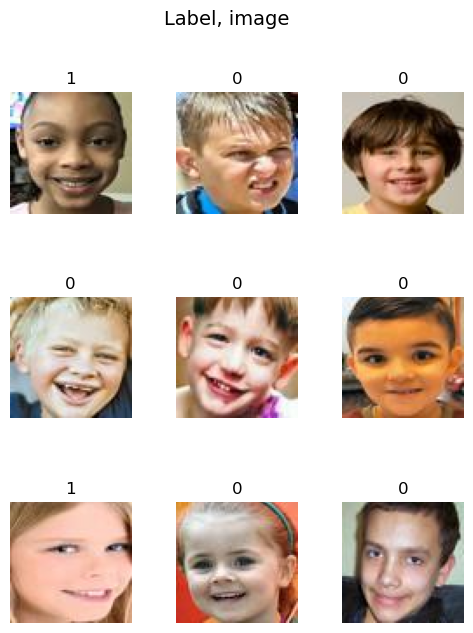

In [93]:
import warnings
from matplotlib import pyplot as plt
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

m, height, width, channels = xtrain.shape

fig, axes = plt.subplots(3, 3, figsize=(5, 7))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) 

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = xtrain[random_index]

    ax.imshow(X_random_reshaped)
    
    ax.set_title(ytrain[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

plt.show()


In [135]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential
import tensorflow as tf

input_shape = (70, 70, 3)

model_cnn = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        
        Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(),
        
        # Dense layers with regularization and dropout
        Dense(100, activation='relu'),
        BatchNormalization(),
       
        
        Dense(50, activation='relu'),
        BatchNormalization(),
     
        
        Dense(25, activation='relu'),
        BatchNormalization(),
        
        Dense(1, activation='sigmoid', name='output')
    ], name="my_cnn_model"
)


num_layers = len(model_cnn.layers)

num_layers

In [136]:
model_cnn.summary()

Model: "my_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 70, 70, 128)       9728      
                                                                 
 batch_normalization_69 (Ba  (None, 70, 70, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 35, 35, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_60 (Dropout)        (None, 35, 35, 128)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 35, 35, 64)        131136    
                                                                 
 batch_normalization_70 (Ba  (None, 35, 35, 64)       

In [137]:
model_cnn.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model_cnn.fit(
    xtrain, ytrain,
    epochs=23,
    validation_data=(xval, yval)
)


Epoch 1/23
56/56 [==============================] - 78s 1s/step - loss: 0.6774 - accuracy: 0.6307 - val_loss: 1.1758 - val_accuracy: 0.4901
Epoch 2/23
56/56 [==============================] - 72s 1s/step - loss: 0.5660 - accuracy: 0.7087 - val_loss: 1.8554 - val_accuracy: 0.4901
Epoch 3/23
56/56 [==============================] - 102s 2s/step - loss: 0.5216 - accuracy: 0.7370 - val_loss: 2.0066 - val_accuracy: 0.4901
Epoch 4/23
56/56 [==============================] - 85s 2s/step - loss: 0.4945 - accuracy: 0.7415 - val_loss: 2.4343 - val_accuracy: 0.4901
Epoch 5/23
56/56 [==============================] - 78s 1s/step - loss: 0.5129 - accuracy: 0.7387 - val_loss: 1.4241 - val_accuracy: 0.4901
Epoch 6/23
56/56 [==============================] - 81s 1s/step - loss: 0.4928 - accuracy: 0.7545 - val_loss: 1.4109 - val_accuracy: 0.4901
Epoch 7/23
56/56 [==============================] - 80s 1s/step - loss: 0.4468 - accuracy: 0.7811 - val_loss: 1.0845 - val_accuracy: 0.5298
Epoch 8/23
56/56 [=

In [138]:
test_result = model_cnn.evaluate(xtest, ytest)

if isinstance(test_result, float):
    test_accuracy = test_result
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
else:
    test_loss, test_accuracy = test_result
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')


19/19 [==============================] - 7s 351ms/step - loss: 0.6858 - accuracy: 0.7512
Test Loss: 0.6857760548591614, Test Accuracy: 75.12%


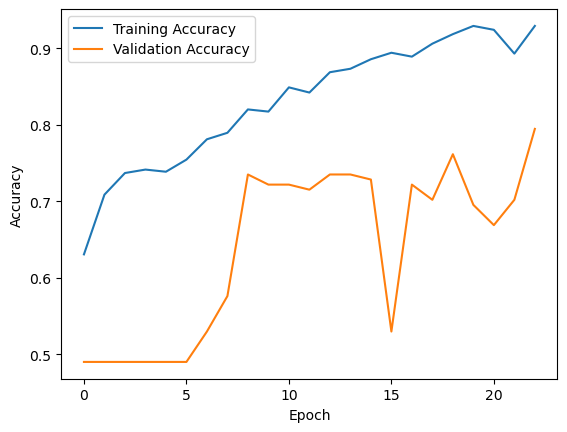

In [139]:
# Access the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  
plt.show()


In [231]:
autism_model=model_cnn.save(r"E:\autism_model.h5",save_format='h5')

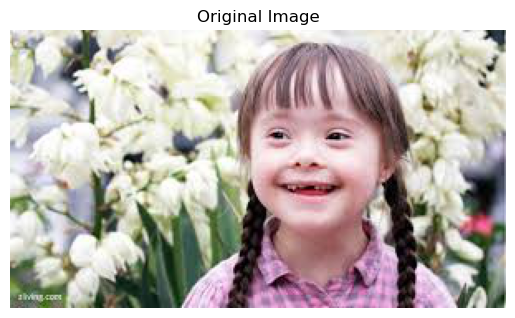

In [249]:
import matplotlib.pyplot as plt

# Read the image
image_path = r"E:\images.jpeg"  # Replace this with the path to your image file
image = plt.imread(image_path)

# Display the image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Turn off axis
plt.show()


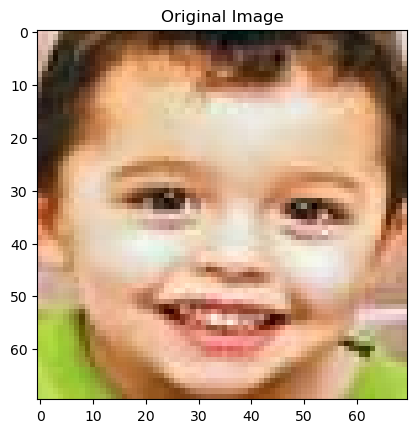

1/1 [==============================] - 0s 419ms/step
[[0.25752923]]
the predicted class is autism chiled


In [242]:
from PIL import Image
image_of_A = xdata[374]

original_image = Image.fromarray((image_of_A * 255).reshape((70, 70,3)).astype(np.uint8))
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.show()

prediction = model_cnn.predict(image_of_A.reshape(1,70,70,3))  

print(prediction)
if prediction<0.5:
    print("the predicted class is autism chiled")
else:
    print("the predicted class is non_autism chiled")


In [251]:
import cv2
import numpy as np

# Load the face detection cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to preprocess the captured frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (70, 70))  # Resize the frame to match the input shape of the model
    frame = np.array(frame) / 255.0  # Normalize pixel values
    return frame

# Function to make predictions on the captured frame
def predict_frame(frame):
    # Perform face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Check if faces are detected
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            face_img = frame[y:y + h, x:x + w]  # Extract the face region
            # Preprocess the face image
            face_img = preprocess_frame(face_img)
            # Make a prediction using the CNN model
            prediction = model_cnn.predict(face_img.reshape(1, 70, 70, 3))
            if prediction < 0.5:
                label = "Autism Child"
            else:
                label = "Non-Autism Child"
            # Draw rectangle around the detected face region
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # Put the predicted label on the frame
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Perform prediction on the captured frame
    predicted_frame = predict_frame(frame)

    # Display the resulting frame
    cv2.imshow('Live Prediction', predicted_frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 130ms/step
